## Plotting the distribution of programming languages

In [7]:
import urllib.request
from unidiff import PatchSet
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pandas import json_normalize
from tabulate import tabulate 
import glob
# time of execution
import time
from pathlib import Path

output_dir = 'data/FixMe/'

df_patch = pd.read_csv(f'{output_dir}/patches.csv')

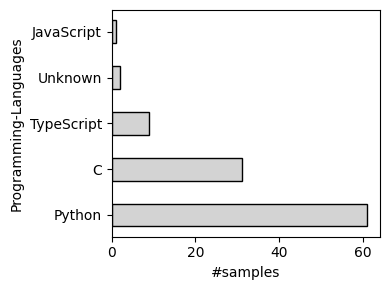

In [8]:
# plot_value_counts(col=df_patch['pl'], xlabel='Programming-Languages', ylabel='#patches')


pls = df_patch['pl'].value_counts()

fig, ax = plt.subplots(figsize=(4, 3))
bar_width = 0.5
bars = ax.barh(pls.index, pls.values, color='lightgray', edgecolor='black', height=bar_width)
ax.set_ylabel('Programming-Languages')
ax.set_xlabel('#samples')
plt.tight_layout()
plt.savefig(f'figure/Programming-Languages.png')
plt.show()


# The function that counts the length of words in the values of a specified column in a DataFrame and plots the distribution as a histogram:

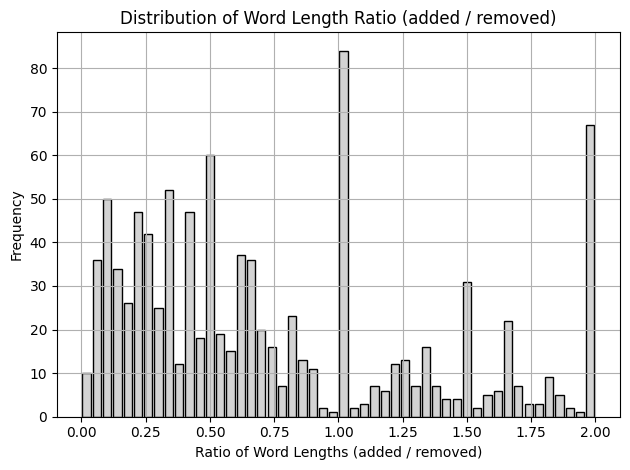

In [9]:
def count_and_plot_word_length_ratio(df, column1, column2):
    """
    Count the length of words in the values of two specified columns in a DataFrame,
    compute the ratio of corresponding word lengths, and plot the distribution as a histogram.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column1 (str): The name of the first column in the DataFrame to analyze.
        column2 (str): The name of the second column in the DataFrame to analyze.
    """
    # Extract values from the specified columns
    values1 = df[column1]
    values2 = df[column2]

    # Tokenize words and count lengths for both columns
    word_lengths1 = [len(word) for value in values1 for word in str(value).split()]
    word_lengths2 = [len(word) for value in values2 for word in str(value).split()]

    # Compute the ratio of word lengths
    word_length_ratio = [length2 / length1 if length1 != 0 else float('NaN') for length1, length2 in zip(word_lengths1, word_lengths2)]

    # Plot histogram
    plt.hist(word_length_ratio, bins=50, range=(0, 2), rwidth=0.8, color='lightgray', edgecolor='black')
    plt.xlabel('Ratio of Word Lengths (added / removed)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Word Length Ratio (added / removed)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('figure/word-length-ratio.png')
    plt.show()
    return word_length_ratio

word_length_ratio = count_and_plot_word_length_ratio(df_patch, 'removed', 'added')

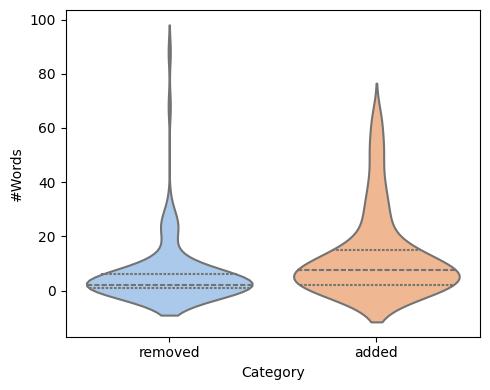

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

def count_and_plot_word_lengths(df, column1, column2, outlier_threshold=0.95):
    """
    Count the number of words in the values of two specified columns in a DataFrame
    and plot the distributions as violin plots side by side.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column1 (str): The name of the first column in the DataFrame to analyze.
        column2 (str): The name of the second column in the DataFrame to analyze.
        outlier_threshold (float): The threshold for identifying outliers (default is 0.95).
    """
    # Extract values from the specified columns
    values1 = df[column1]
    values2 = df[column2]

    # Count number of words for both columns
    word_counts1 = [len(str(value).split()) for value in values1]
    word_counts2 = [len(str(value).split()) for value in values2]

    # Identify outliers using quantiles
    max_outlier_count1 = np.quantile(word_counts1, outlier_threshold)
    max_outlier_count2 = np.quantile(word_counts2, outlier_threshold)

    # Filter out outliers
    filtered_word_counts1 = [count for count in word_counts1 if count <= max_outlier_count1]
    filtered_word_counts2 = [count for count in word_counts2 if count <= max_outlier_count2]

    # # Combine word counts from both columns
    # combined_word_counts = {'Category': [column1]*len(word_counts1) + [column2]*len(word_counts2),
    #                         '#Words': word_counts1 + word_counts2}
    
    # Combine word counts from both columns without outliers
    combined_word_counts = {'Category': [column1]*len(filtered_word_counts1) + [column2]*len(filtered_word_counts2),
                            '#Words': filtered_word_counts1 + filtered_word_counts2}

    # Create DataFrame from combined data
    combined_df = pd.DataFrame(combined_word_counts)

    # Plot violin plot
    plt.figure(figsize=(5, 4))
    sns.violinplot(x='Category', y='#Words', data=combined_df, inner='quartile', hue='Category', palette='pastel', color='lightgray', linewidth=1.5, width=0.8)
    plt.xlabel('Category')
    plt.ylabel('#Words')
    # plt.title('Distribution of Word Counts')
    # plt.title(f'Distribution of Word Counts in {column2}')
    plt.tight_layout()
    plt.savefig(f'figure/word-counts-violin.png')
    plt.show()

# Call the function with the DataFrame and column names
count_and_plot_word_lengths(df_patch, 'removed', 'added')